# Linear Regression on Automotives 

    1. Title: 1985 Auto Imports Database
    
    2. Source Information:
       -- Creator/Donor: Jeffrey C. Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
       -- Date: 19 May 1987
       -- Sources:
         1) 1985 Model Import Car and Truck Specifications, 1985 Ward's
            Automotive Yearbook.
         2) Personal Auto Manuals, Insurance Services Office, 160 Water
            Street, New York, NY 10038 
         3) Insurance Collision Report, Insurance Institute for Highway
            Safety, Watergate 600, Washington, DC 20037
    [...]
    8. Missing Attribute Values: (denoted by "?")
       Attribute #:   Number of instances missing a value:
       2.             41
       6.             2
       19.            4
       20.            4
       22.            2
       23.            2
       26.            4

Source: [https://archive.ics.uci.edu/ml/datasets/Automobile](https://archive.ics.uci.edu/ml/datasets/Automobile)

In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from math import sqrt
import seaborn as sns
sns.set()

## Data Pre-Processing 

In [2]:
attributes = ["symboling", "normalized-losses", "make", "fuel-type", \
              "aspiration", "num-of-doors", "body-style", \
              "drive-wheels", "engine-location", "wheel-base", \
              "length", "width", "height", "curb-weight", \
              "engine-type", "num-of-cylinders", "engine-size", \
              "fuel-system", "bore", "stroke", "compression-ratio", \
              "horsepower", "peak-rpm", "city-mpg", "highway-mpg", \
              "price"]

data = pd.read_csv("data/imports-85.data", header=None, names=attributes)

In [3]:
# drops rows if any NA values are present (i.e values are missing)
data = data.dropna(axis=0,how='any')

In [4]:
""" --------------------------------------------------------------------
Missing values have been coded with a question mark, but 
pandas.DataFrame.dropna does not recognize ? as a missing value. 
-------------------------------------------------------------------- """

data.replace("?", np.nan, inplace= True)

In [5]:
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


### Select subset of independent variables

In [8]:
include = ["length", "width", "height", "curb-weight", \
           "engine-size", "horsepower", "price"]

In [9]:
data_selected = data[include]

In [10]:
for col in data_selected.columns:
    data_selected[col] = pd.to_numeric(data_selected[col], errors='coerce')

/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
data_selected = data_selected.dropna(axis=0)

In [12]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 7 columns):
length         199 non-null float64
width          199 non-null float64
height         199 non-null float64
curb-weight    199 non-null int64
engine-size    199 non-null int64
horsepower     199 non-null float64
price          199 non-null float64
dtypes: float64(5), int64(2)
memory usage: 12.4 KB


In [13]:
data_selected.describe()

,length,width,height,curb-weight,engine-size,horsepower,price
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,174.151256,65.882412,53.775879,2556.030151,126.824121,103.396985,13243.432161
std,12.371905,2.110996,2.447039,519.855544,41.752932,37.553843,7978.707609
min,141.100000,60.300000,47.800000,1488.000000,61.000000,48.000000,5118.000000
25%,166.550000,64.100000,52.000000,2157.000000,97.500000,70.000000,7775.000000
50%,173.200000,65.500000,54.100000,2414.000000,119.000000,95.000000,10345.000000
75%,183.500000,66.700000,55.550000,2930.500000,143.000000,116.000000,16501.500000
max,208.100000,72.000000,59.800000,4066.000000,326.000000,262.000000,45400.000000


### Define the dependent (target) variable 

In [14]:
target = pd.DataFrame(data_selected["price"])

In [15]:
type(target)

pandas.core.frame.DataFrame

### Create a list of all combinations of independent variables 

In [16]:
list_of_variables = include[:-1]

combinations = []

for i in range(2, len(list_of_variables)+1):
   combinations += itertools.combinations(list_of_variables, i)

combinations = list(combinations)

In [17]:
len(combinations)

57

--- 
## Subsetting (Test and Training Split)

In [18]:
""" --------------------------------------------------------------------
Split the dataset pseudo-randomly into training and testing subsets, 
for details see 

URL: http://scikit-learn.org/stable/modules/generated/
     sklearn.model_selection.train_test_split.html
-------------------------------------------------------------------- """

data_train, data_test = train_test_split(data_selected, test_size=0.2, random_state=11)

In [19]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 168 to 159
Data columns (total 7 columns):
length         159 non-null float64
width          159 non-null float64
height         159 non-null float64
curb-weight    159 non-null int64
engine-size    159 non-null int64
horsepower     159 non-null float64
price          159 non-null float64
dtypes: float64(5), int64(2)
memory usage: 9.9 KB


In [20]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 179 to 122
Data columns (total 7 columns):
length         40 non-null float64
width          40 non-null float64
height         40 non-null float64
curb-weight    40 non-null int64
engine-size    40 non-null int64
horsepower     40 non-null float64
price          40 non-null float64
dtypes: float64(5), int64(2)
memory usage: 2.5 KB


--- 
## Linear Regression with *one* independent variable 

In [21]:
# create linear regression object 
lm = linear_model.LinearRegression()

In [22]:
# define variables 
X_train = (data_train["length"].values).reshape(-1, 1) # this is only necessary when using 1 independent variable! 
y_train = data_train["price"]
X_test = (data_test["length"].values).reshape(-1, 1) # this is only necessary when using 1 independent variable! 
y_test = data_test["price"]

In [23]:
# fit linear model to training subset 
model = lm.fit(X_train, y_train)

# make a prediction using the test subset
y_prediction = lm.predict(X_test)

In [24]:
# return the R² score 
r2_score(y_test, y_prediction)

0.5621912462907408

In [25]:
# return the Root Mean Square Error (RMSE)
sqrt(mean_squared_error(y_test, y_prediction))

4891.507486024024

--- 
## Multiple Linear Regression on *all* variables 

In [26]:
# create linear regression object 
lm = linear_model.LinearRegression()

In [27]:
item = ["length", "width", "height", "curb-weight", "engine-size", "horsepower"]
target = ["price"]

# define variables 
X_train = data_train.loc[:,item] 
y_train = data_train.loc[:,target]
X_test = data_test.loc[:,item] 
y_test = data_test.loc[:,target]

In [28]:
# fit linear model to training subset 
model = lm.fit(X_train, y_train)

# make a prediction using the test subset
y_prediction = lm.predict(X_test)

In [29]:
# return the R² score 
r2_score(y_test, y_prediction)

0.8244803233868335

In [30]:
# return the Root Mean Square Error (RMSE)
sqrt(mean_squared_error(y_test, y_prediction))

3097.158327478804

--- 
## Multiple Linear Regression on *all combinations* of variables 

In [31]:
# create linear regression object 
lm = linear_model.LinearRegression()

In [32]:
""" --------------------------------------------------------------------
calc_r2_score fits a linear model to a training subset, 
makes a prediction for the test subset, 
and returns the R² score (quality of prediction index)
-------------------------------------------------------------------- """

def calc_r2_score(item): 
    # define variables 
    X_train = data_train.loc[:,features] 
    y_train = data_train.loc[:,target]
    X_test = data_test.loc[:,features] 
    y_test = data_test.loc[:,target]
    
    # fit linear model to training subset 
    model = lm.fit(X_train, y_train)
    
    # make a prediction using the test subset
    y_prediction = lm.predict(X_test)
    
    # return the R² score 
    return r2_score(y_test, y_prediction)

""" --------------------------------------------------------------------
calc_MSE follows up and returns the Mean Squared Error 
-------------------------------------------------------------------- """

def calc_RMSE(item):
    # define variables 
    X_train = data_train.loc[:,features] 
    y_train = data_train.loc[:,target]
    X_test = data_test.loc[:,features] 
    y_test = data_test.loc[:,target]
    
    # fit linear model to training subset 
    model = lm.fit(X_train, y_train)
    
    # make a prediction using the test subset
    y_prediction = lm.predict(X_test)
    
    # return the Root Mean Square Error (RMSE)
    return sqrt(mean_squared_error(y_test, y_prediction))

In [33]:
""" --------------------------------------------------------------------
define independent variables and target variable
-------------------------------------------------------------------- """

""" ------------------------ numerical only ----------------------------
-------------------------------------------------------------------- """
features = ["length", "width", "height", "curb-weight", "engine-size", 
            "horsepower"]

target   = ["price"]

# opens an empty list for results of the upcoming for loop 
combinations = []

for i in range(2, len(features)+1):
    combinations += itertools.combinations(features, i)

In [37]:
len(combinations)

57

In [38]:
""" --------------------------------------------------------------------
starts by defining empty lists to be filled by the for loop, 
then iterates over all elements of the list "combinations"
-------------------------------------------------------------------- """

features_included = []
results_r2_score = []
results_RMSE = []
no_of_features = []

for index, features in enumerate(combinations):
    features_included.append(features)
    results_r2_score.append(calc_r2_score(combinations[index]))
    results_RMSE.append(calc_RMSE(combinations[index]))
    no_of_features.append(len(combinations[index]))

In [39]:
# merge lists to a dataframe results_df 
# with the columns: 
# index, features, no_of_features, results_r2_score, results_RMSE 

results_df = pd.DataFrame(np.column_stack([features_included, no_of_features, results_r2_score, results_RMSE]),
                         columns=["features", "no_of_features", "results_r2_score", "results_RMSE"])

In [40]:
results_df.head()

,features,no_of_features,results_r2_score,results_RMSE
0,"(length, width)",2,0.682533,4165.33
1,"(length, height)",2,0.619875,4557.89
2,"(length, curb-weight)",2,0.817765,3155.85
3,"(length, engine-size)",2,0.761597,3609.58
4,"(length, horsepower)",2,0.793765,3357.23


In [42]:
results_df.sort_values(["results_r2_score"],ascending=False).head()

,features,no_of_features,results_r2_score,results_RMSE
51,"(length, width, height, curb-weight, horsepower)",5,0.846695,2894.53
39,"(length, width, curb-weight, horsepower)",4,0.841823,2940.17
46,"(width, height, curb-weight, horsepower)",4,0.841786,2940.51
29,"(width, curb-weight, horsepower)",3,0.841686,2941.44
42,"(length, height, curb-weight, horsepower)",4,0.836598,2988.33


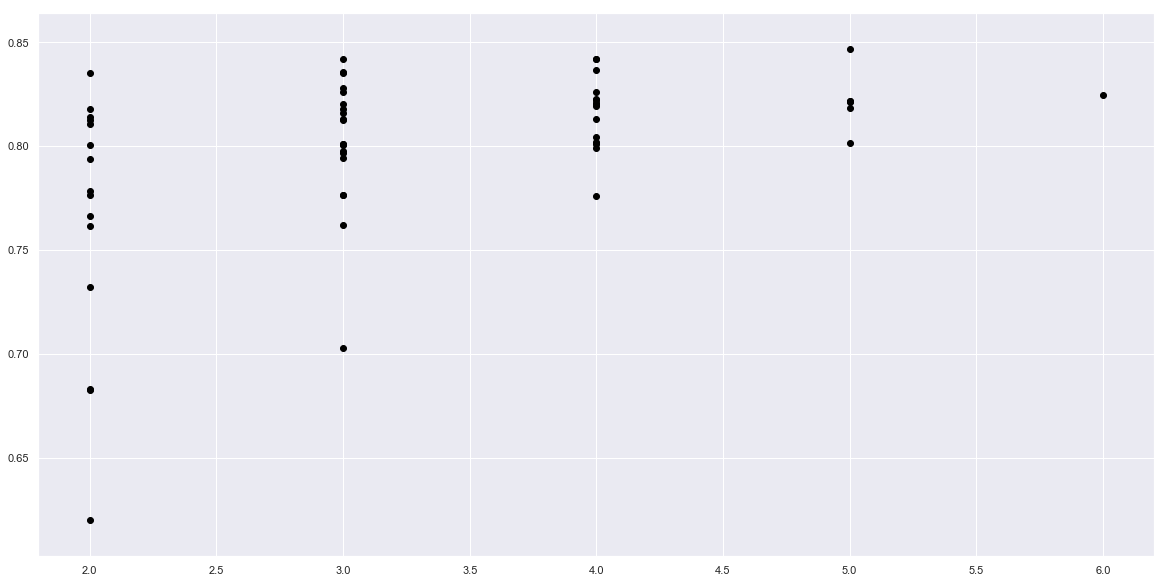

In [43]:
# Plot outputs
plt.figure(figsize=(20,10))
plt.scatter(results_df["no_of_features"], results_df["results_r2_score"], color='black')
plt.show();

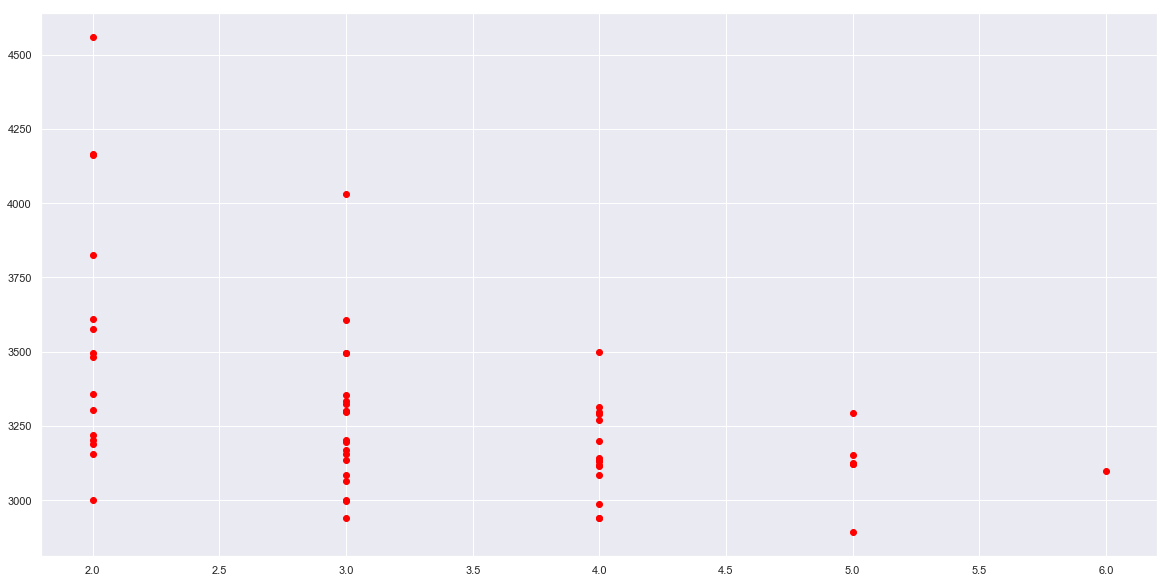

In [44]:
# Plot outputs
plt.figure(figsize=(20,10))
plt.scatter(results_df["no_of_features"], results_df["results_RMSE"], color='red')
plt.show();